In [1]:
%pylab qt
%matplotlib inline

import pandas
import scipy.constants as cst
import h5py
import matplotlib.colors as mcol
import matplotlib.cm as cm
import io
from scipy.fftpack import fft as fft

from scipy import signal
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz
import matplotlib.mlab as mlab

dpi = 200
def mysavefig(name):
    plt.tight_layout()
    plt.savefig("figures/"+name, bbox_inches="tight", dpi=dpi)

def lowpass(t, y, fc):
    Te = t[1]-t[0]
    tau = 1/(2*np.pi*fc)
    filtered_y = [0]
    for i, val in enumerate(y):
        if i==0:
            pass
        else:
            a = tau/Te
            filtered_y.append((a/(1+a))*filtered_y[-1]+1/(1+a) * val)
    return np.array(filtered_y)

def highpass(t, y, fc):
    Te = t[1]-t[0]
    tau = 1/(2*np.pi*fc)
    filtered_y = [0]
    for i, val in enumerate(y):
        if i==0:
            pass
        else:
            a = tau/Te
            filtered_y.append((a/(1+a))*filtered_y[-1] + a/(1+a) * (y[i]-y[i-1]))
    return np.array(filtered_y)

def make_fft(x,y):
    N = len(x)
    T = x[1]-x[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    return xf, 2.0/N * np.abs(yf[0:N//2])

Populating the interactive namespace from numpy and matplotlib


# Import data

In [3]:
fn_H1 = 'H-H1_LOSC_4_V2-1126259446-32.hdf5'
strain_H1, time_H1, chan_dict_H1 = rl.loaddata(fn_H1, 'H1')
# and then from L1
fn_L1 = 'L-L1_LOSC_4_V2-1126259446-32.hdf5'
strain_L1, time_L1, chan_dict_L1 = rl.loaddata(fn_L1, 'L1')

NameError: name 'rl' is not defined

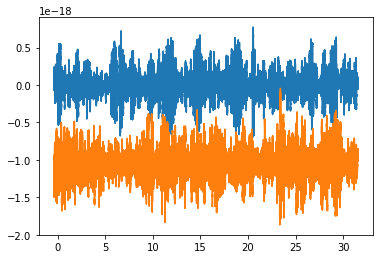

In [5]:
folder = "figures/data/"
filename_h = "H-H1_LOSC_4_V2-1126259446-32.txt"
filename_l = "L-L1_LOSC_4_V2-1126259446-32.txt"
sample_rate  = 2**12
duration     = 32
center       = 1126259462

tevent = 1126259462.422         # Mon Sep 14 09:50:45 GMT 2015 
deltat = 5.                     # seconds around the event

t = np.linspace(0, duration, duration*sample_rate) + center - tevent
h = np.loadtxt(folder+filename_h)
l = np.loadtxt(folder+filename_l)

plt.plot(t, h)
plt.plot(t, l)

#plt.xlim(-deltat, deltat)

# Test with home made filter

(10, 2000)

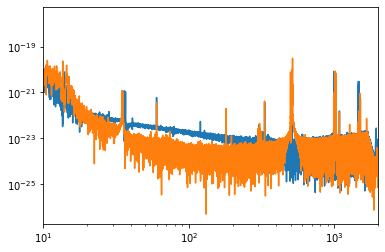

In [43]:
f_h, y_h = make_fft(t, h)
f_l, y_l = make_fft(t, l)
plt.loglog(f_h, y_h)
plt.loglog(f_l, y_l)
plt.xlim(10,2000)

(10, 2000)

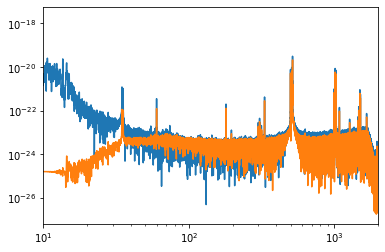

In [38]:
lfiltered = l
for i in range(10):
    lfiltered = highpass(t, lfiltered, 10)
f_l, y_lfiltered = make_fft(t, lfiltered)
plt.loglog(f_l, y_l)
plt.loglog(f_l, y_lfiltered)
plt.xlim(10,2000)

(10, 2000)

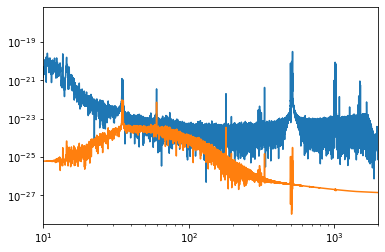

In [39]:
for i in range(10):
    lfiltered = lowpass(t, lfiltered, 200)
f_l, y_lfiltered = make_fft(t, lfiltered)
plt.loglog(f_l, y_l)
plt.loglog(f_l, y_lfiltered)
plt.xlim(10,2000)

(5, 10)

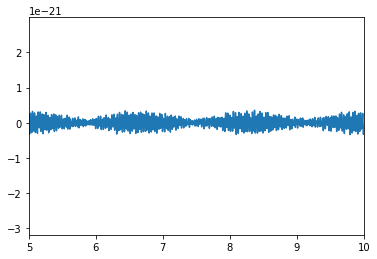

In [41]:
#plt.plot(t, l)
plt.plot(t, lfiltered)
plt.xlim(5,10)

# Scipy filtering

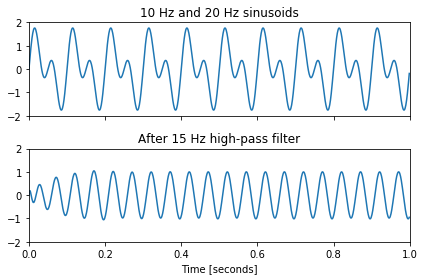

In [68]:
t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

sos = signal.butter(10, 15, 'hp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz high-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

(-0.1, 0.1)

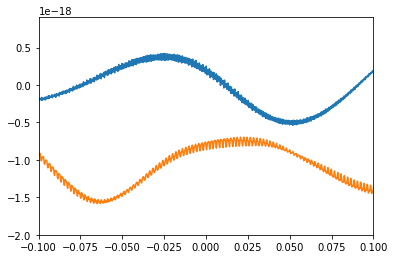

In [132]:
folder = "figures/data/"
filename_h = "H-H1_LOSC_4_V2-1126259446-32.txt"
filename_l = "L-L1_LOSC_4_V2-1126259446-32.txt"
sample_rate  = 2**12
duration     = 32
center       = 1126259462

tevent = 1126259462.422         # Mon Sep 14 09:50:45 GMT 2015 
deltat = 5.                     # seconds around the event

t = np.linspace(0, duration, duration*sample_rate) + center - tevent
h = np.loadtxt(folder+filename_h)
l = np.loadtxt(folder+filename_l)

plt.plot(t, h)
plt.plot(t, l)
plt.xlim(-0.1,0.1)

# This part is actually working

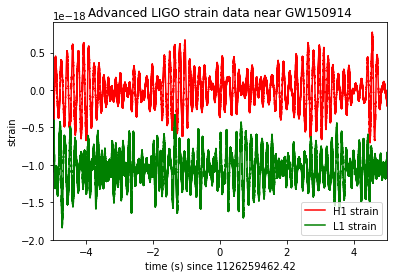

In [2]:
##### import data

folder = "figures/data/"
filename_h = "H-H1_LOSC_4_V2-1126259446-32.txt"
filename_l = "L-L1_LOSC_4_V2-1126259446-32.txt"
fs           = 2**12
duration     = 32
center       = 1126259462-duration/2

tevent = 1126259462.42         # Mon Sep 14 09:50:45 GMT 2015 
deltat = 5.                     # seconds around the event

##### plot first data
time_H1 = np.linspace(0, duration, duration*fs) + center
time_L1 = time_H1
time = time_H1
dt = time[1] - time[0]

strain_H1 = np.loadtxt(folder+filename_h)
strain_L1 = np.loadtxt(folder+filename_l)

plt.figure()
plt.plot(time_H1-tevent,strain_H1,'r',label='H1 strain')
plt.plot(time_L1-tevent,strain_L1,'g',label='L1 strain')
plt.xlabel('time (s) since '+str(tevent))
plt.ylabel('strain')
plt.legend(loc='lower right')
plt.title('Advanced LIGO strain data near GW150914')

plt.xlim(-5, 5)

NRtime, NR_H1 = np.genfromtxt(folder+'GW150914_4_NR_waveform.txt').transpose()

Text(0.5, 1.0, 'Advanced LIGO strain data near GW150914')

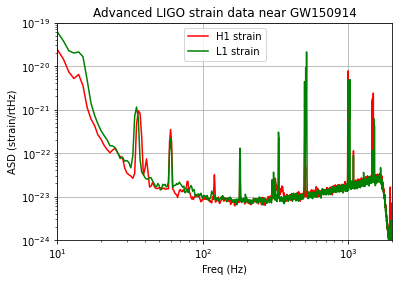

In [3]:
# number of sample for the fast fourier transform:
NFFT = 1*fs
fmin = 10
fmax = 2000
Pxx_H1, freqs = mlab.psd(strain_H1, Fs = fs, NFFT = NFFT)
Pxx_L1, freqs = mlab.psd(strain_L1, Fs = fs, NFFT = NFFT)

# We will use interpolations of the ASDs computed above for whitening:
psd_H1 = interp1d(freqs, Pxx_H1)
psd_L1 = interp1d(freqs, Pxx_L1)

# plot the ASDs:
plt.figure()
plt.loglog(freqs, np.sqrt(Pxx_H1),'r',label='H1 strain')
plt.loglog(freqs, np.sqrt(Pxx_L1),'g',label='L1 strain')
plt.axis([fmin, fmax, 1e-24, 1e-19])
plt.grid('on')
plt.ylabel('ASD (strain/rtHz)')
plt.xlabel('Freq (Hz)')
plt.legend(loc='upper center')
plt.title('Advanced LIGO strain data near GW150914')
#plt.savefig('GW150914_ASDs.png')

In [4]:
# function to whiten data
def whiten(strain, interp_psd, dt):
    Nt = len(strain)
    freqs = np.fft.rfftfreq(Nt, dt)

    # whitening: transform to freq domain, divide by asd, then transform back, 
    # taking care to get normalization right.
    hf = np.fft.rfft(strain)
    white_hf = hf / (np.sqrt(interp_psd(freqs) /dt/2.))
    white_ht = np.fft.irfft(white_hf, n=Nt)
    return white_ht

# now whiten the data from H1 and L1, and also the NR template:
strain_H1_whiten = whiten(strain_H1,psd_H1,dt)
strain_L1_whiten = whiten(strain_L1,psd_L1,dt)
NR_H1_whiten = whiten(NR_H1,psd_H1,dt)

Text(0.5, 1.0, 'Advanced LIGO WHITENED strain data near GW150914')

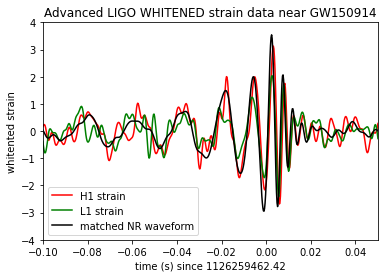

In [5]:
bb, ab = butter(4, [20.*2./fs, 300.*2./fs], btype='band')
strain_H1_whitenbp = filtfilt(bb, ab, strain_H1_whiten)
strain_L1_whitenbp = filtfilt(bb, ab, strain_L1_whiten)
NR_H1_whitenbp = filtfilt(bb, ab, NR_H1_whiten)

# plot the data after whitening:
# first, shift L1 by 7 ms, and invert. See the GW150914 detection paper for why!
strain_L1_shift = -np.roll(strain_L1_whitenbp,int(0.007*fs))

plt.figure()
plt.plot(time-tevent,strain_H1_whitenbp,'r',label='H1 strain')
plt.plot(time-tevent,strain_L1_shift,'g',label='L1 strain')
plt.plot(NRtime+0.002,NR_H1_whitenbp,'k',label='matched NR waveform')
plt.xlim([-0.1,0.05])
plt.ylim([-4,4])
plt.xlabel('time (s) since '+str(tevent))
plt.ylabel('whitented strain')
plt.legend(loc='lower left')
plt.title('Advanced LIGO WHITENED strain data near GW150914')

# Simplified setup

(-5.0, 5.0)

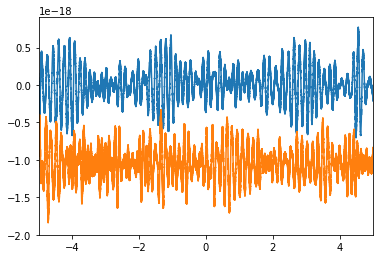

In [5]:
plt.plot(time_H1-tevent, strain_H1)
plt.plot(time_L1-tevent, strain_L1)
plt.xlim(-5, 5)

(10.0, 2000.0, 1e-24, 1e-19)

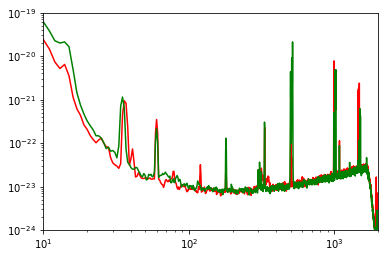

In [6]:
NFFT =1*fs                                                #length of the bin for fft calculation in psd
fmin = 10                                                 #limits for the plot
fmax = 2000
Pxx_H1, freqs = mlab.psd(strain_H1, Fs = fs, NFFT = NFFT) #compute psd
Pxx_L1, freqs = mlab.psd(strain_L1, Fs = fs, NFFT = NFFT)

# We will use interpolations of the ASDs computed above for whitening:
psd_H1 = interp1d(freqs, Pxx_H1)                          #create functions for whitening
psd_L1 = interp1d(freqs, Pxx_L1)

plt.loglog(freqs, np.sqrt(Pxx_H1),'r',label='H1 strain')
plt.loglog(freqs, np.sqrt(Pxx_L1),'g',label='L1 strain')
plt.axis([fmin, fmax, 1e-24, 1e-19])

(-4.0, 4.0)

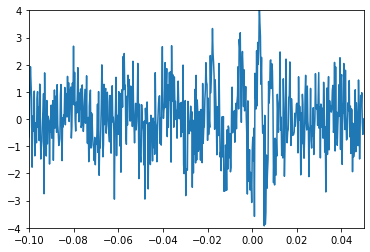

In [7]:
def whiten(strain, interp_psd, dt):
    Nt = len(strain)
    freqs = np.fft.rfftfreq(Nt, dt)

    # whitening: transform to freq domain, divide by asd, then transform back, 
    # taking care to get normalization right.
    hf = np.fft.rfft(strain)
    white_hf = hf / (np.sqrt(interp_psd(freqs) /dt/2.))
    white_ht = np.fft.irfft(white_hf, n=Nt)
    return white_ht

# now whiten the data from H1 and L1, and also the NR template:
strain_H1_whiten = whiten(strain_H1,psd_H1,dt)
strain_L1_whiten = whiten(strain_L1,psd_L1,dt)
NR_H1_whiten = whiten(NR_H1,psd_H1,dt)

plt.plot(time-tevent, strain_H1_whiten)
plt.xlim([-0.1,0.05])
plt.ylim([-4,4])

Text(0.5, 1.0, 'Advanced LIGO WHITENED strain data near GW150914')

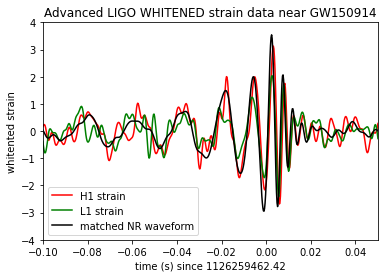

In [8]:
bb, ab = butter(4, [20.*2./fs, 300.*2./fs], btype='band')
strain_H1_whitenbp = filtfilt(bb, ab, strain_H1_whiten)
strain_L1_whitenbp = filtfilt(bb, ab, strain_L1_whiten)
NR_H1_whitenbp = filtfilt(bb, ab, NR_H1_whiten)

# plot the data after whitening:
# first, shift L1 by 7 ms, and invert. See the GW150914 detection paper for why!
strain_L1_shift = -np.roll(strain_L1_whitenbp,int(0.007*fs))

plt.figure()
plt.plot(time-tevent,strain_H1_whitenbp,'r',label='H1 strain')
plt.plot(time-tevent,strain_L1_shift,'g',label='L1 strain')
plt.plot(NRtime+0.002,NR_H1_whitenbp,'k',label='matched NR waveform')
plt.xlim([-0.1,0.05])
plt.ylim([-4,4])
plt.xlabel('time (s) since '+str(tevent))
plt.ylabel('whitented strain')
plt.legend(loc='lower left')
plt.title('Advanced LIGO WHITENED strain data near GW150914')

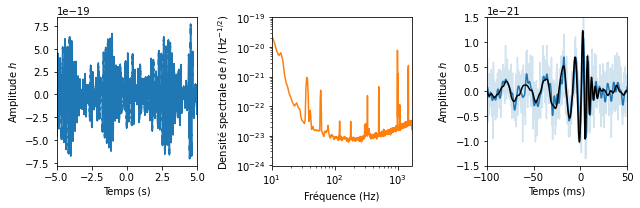

In [9]:
##### Last plot

plt.figure(figsize=(9,3))
sps = (1,3)

ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))
ax3 = plt.subplot2grid(sps, (0,2))

ax1.plot(time_H1-tevent, strain_H1)
#plt.plot(time_L1-tevent, strain_L1)
ax1.set_xlim(-5, 5)
#ax1.xlim([-0.2,0.1])
ax1.set_xlabel("Temps (s)")
ax1.set_ylabel("Amplitude $h$")

ax2.loglog(freqs, np.sqrt(Pxx_H1), "C1", label='H1 strain')
#ax2.loglog(freqs, np.sqrt(Pxx_L1),'g',label='L1 strain')
ax2.set_xlim(fmin, fmax-300)
ax2.set_ylim(1e-24, 1e-19)
ax2.set_xlabel("Fréquence (Hz)")
ax2.set_ylabel("Densité spectrale de $h$ ($\mathrm{Hz}^{-1/2}$) ")

scale = 1.25e-21/3.6
ax3.plot((time-tevent)*1e3, strain_H1_whiten*scale, "C0", alpha=0.2)
ax3.plot((time-tevent)*1e3,strain_H1_whitenbp*scale,'C0',label='H1 strain')
#ax3.plot(time-tevent,strain_L1_shift*scale,'g',label='L1 strain')
ax3.plot((NRtime+0.002)*1e3,NR_H1_whitenbp*scale,'k',label='matched NR waveform')
ax3.set_xlim([-100,50])
ax3.set_ylim([-1.5e-21,1.5e-21])
ax3.set_xlabel("Temps (ms)")
ax3.set_ylabel("Amplitude $h$")

plt.tight_layout()

#mysavefig("GW150914_data.png")

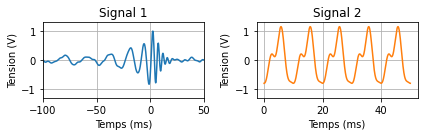

In [28]:
plt.figure(figsize=(6,2))
sps = (1,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))

ax1.plot((NRtime+0.002)*1e3,NR_H1_whitenbp/NR_H1_whitenbp.max())
ax1.set_xlim([-100,50])

f     = 100
omega = 2*np.pi*f
T     = 1/f
t     = np.linspace(0,5*T,100000)
amplitude = 0.8*np.sin(omega*t-np.pi/2) + 0.3*np.sin(2*omega*t) + 0.2*np.sin(3*omega*t+np.pi)
ax2.plot(t*1000, amplitude, "C1")

for ax, title in zip([ax1, ax2], ["Signal 1", "Signal 2"]):
    ax.set_xlabel("Temps (ms)")
    ax.set_ylabel("Tension (V)")
    ax.set_title(title)
    ax.set_ylim(-1.3, 1.3)
    ax.grid()

mysavefig("periodic_signal_ds.png")